# Visualisation using

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

magic command to make plots pop out automatically in the notebook
or in an ipython shell 

In [12]:
# only for the notebook
%matplotlib inline
# only in the ipython shell
# %matplotlib

Um mit Matplotlib arbeiten zu können, muss die Bibliothek erst einmal importiert werden. Damit wir nicht so viel tippen müssen geben wir ihr einen kürzeren Namen:

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Matplotlib works best with numpy arrays, so we import `numpy` as well

In [15]:
import numpy as np

# Simple line plot

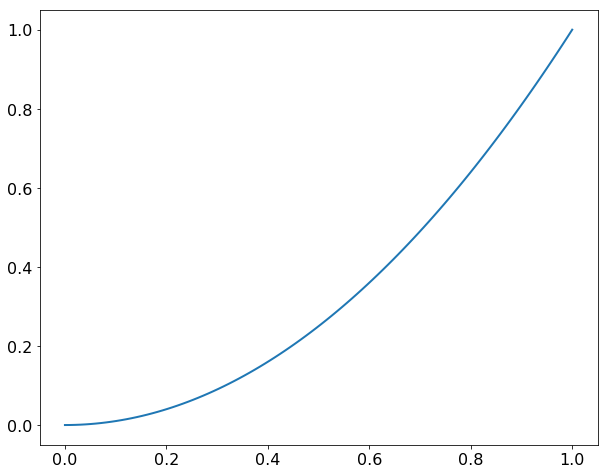

In [16]:
x = np.linspace(0, 1, 100) # 100 numbers from 0 to 1

plt.plot(x, x**2)
# If not interactive, e.g. in a script: 
# plt.show()

## Using different styles for plots

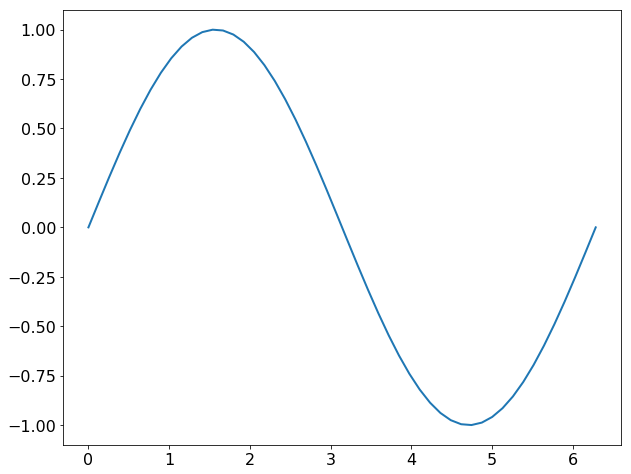

In [17]:
t = np.linspace(0, 2 * np.pi)
plt.plot(t, np.sin(t))

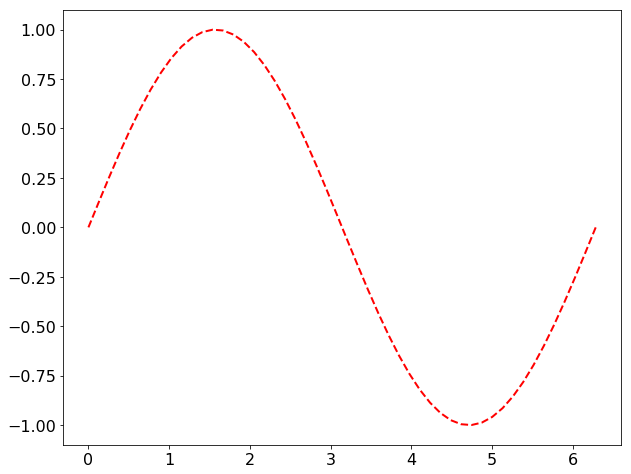

In [18]:
plt.plot(t, np.sin(t), 'r--')

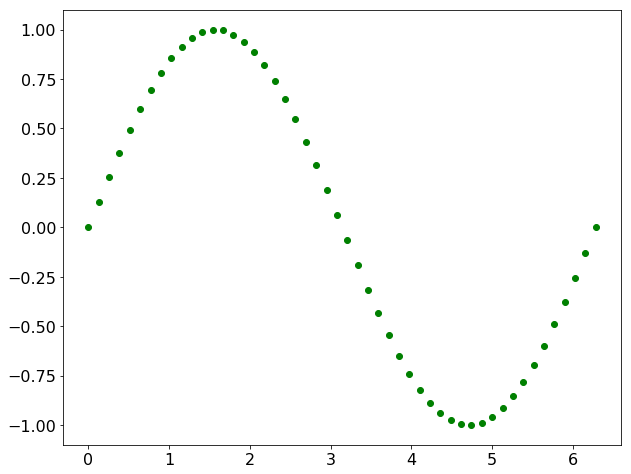

In [19]:
plt.plot(t, np.sin(t), 'go')

All styles and colors: [matplotlib.axes.Axes.plot](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot)



### Setting x and y limits

(-1.2, 1.2)

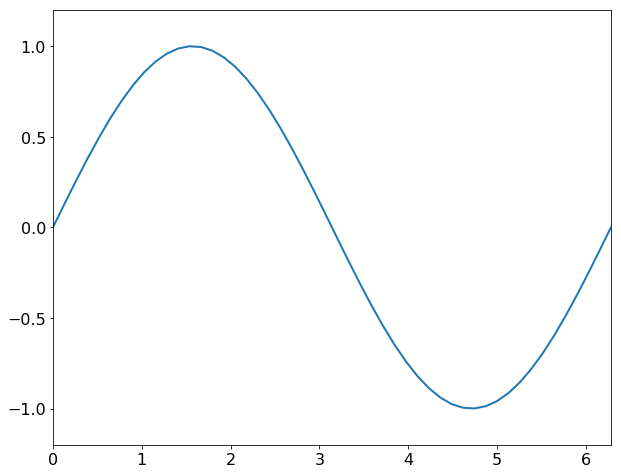

In [20]:
plt.plot(t, np.sin(t))
plt.xlim(0, 2 * np.pi)
plt.ylim(-1.2, 1.2)

## We are still lacking something important
![XKCD comic on why you should label your axes.](http://imgs.xkcd.com/comics/convincing.png "And if you labeled your axes, I could tell you exactly how MUCH better.")

/home/maxnoe/.local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


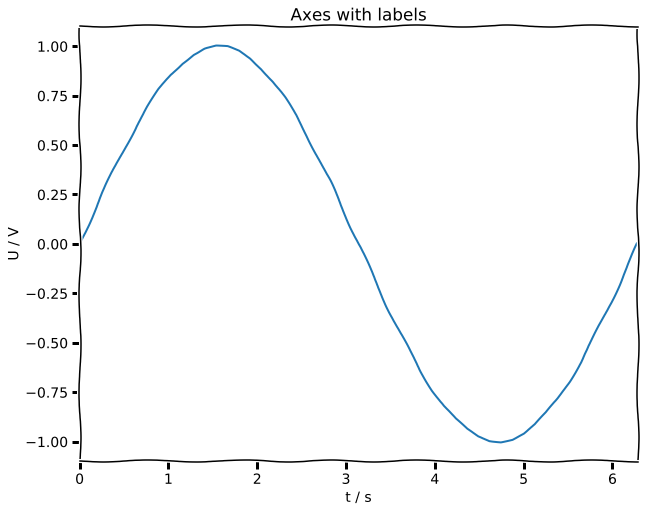

In [21]:
with plt.xkcd():
    plt.title('Axes with labels')
    plt.plot(t, np.sin(t))
    plt.xlabel('t / s')
    plt.ylabel('U / V')
    plt.ylim(-1.1, 1.1)
    plt.xlim(0, 2 * np.pi)

### Matplotlib can handle a rather complete subset of LaTeX in any text

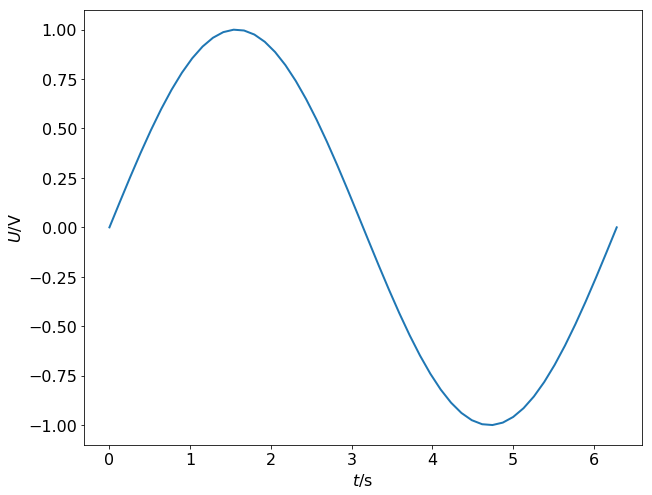

In [26]:
plt.plot(t, np.sin(t))
plt.xlabel(r'$t / \mathrm{s}$')
plt.ylabel(r'$U / \mathrm{V}$')

## Quantities

A quantity is divided by its Unit in the axis label to get the number
at the axis.

See "Rules and style conventions for expressing values of quantities"  http://www.bipm.org/en/publications/si-brochure/section5-3.html


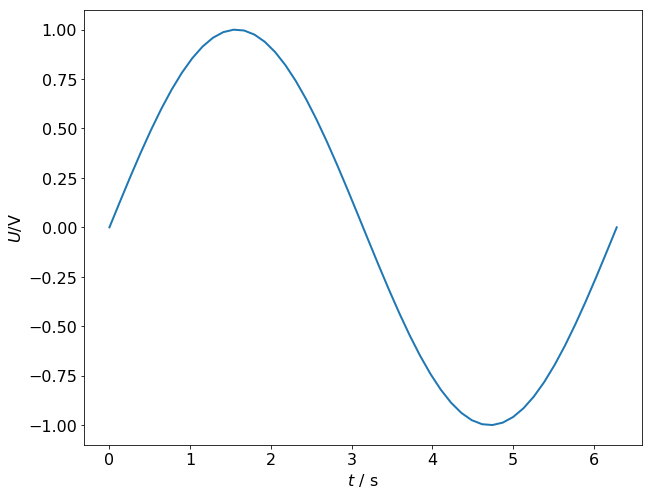

In [28]:
plt.plot(t, np.sin(t))
plt.xlabel(r'$t \ /\ \mathrm{s}$')
plt.ylabel(r'$U / \mathrm{V}$')  # Spaces are a matter of taste (I like spaces)

## Legends

Matplotlib can create legends automatically for plot objects having a label

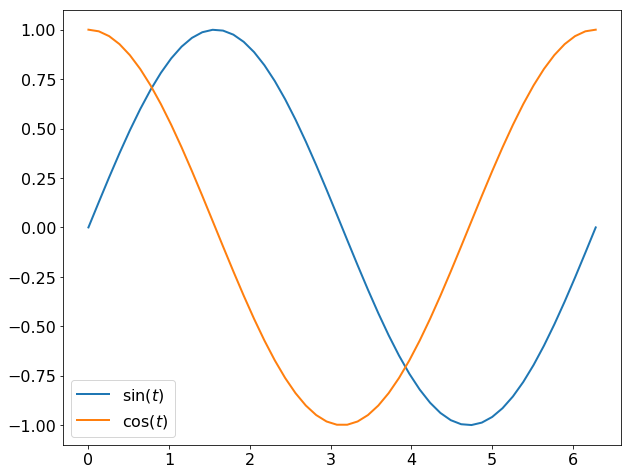

In [33]:
plt.plot(t, np.sin(t), label=r'$\sin(t)$')
plt.plot(t, np.cos(t), label=r'$\cos(t)$')
plt.legend()
#plt.legend(loc='upper center')

## Grids

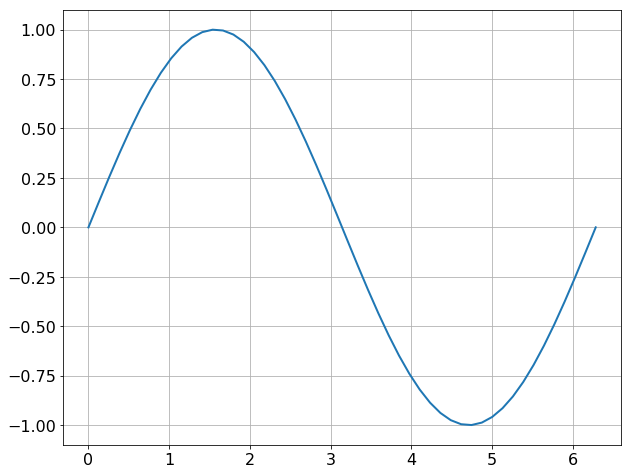

In [35]:
plt.plot(t, np.sin(t))
plt.grid()

## More complex figures

* Multiple lines

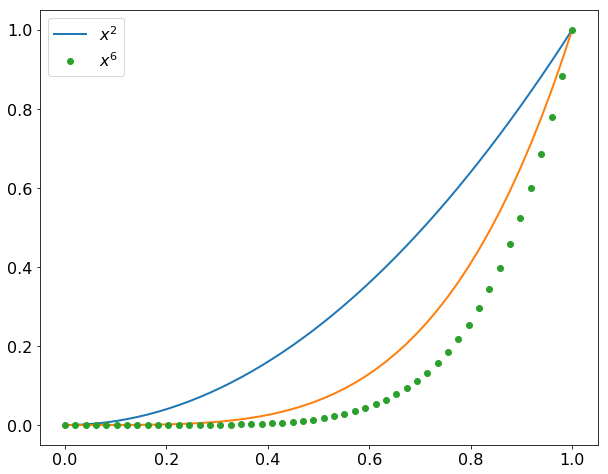

In [36]:
x = np.linspace(0, 1)

plt.plot(x, x**2, label=r'$x^2$')
plt.plot(x, x**4)
plt.plot(x, x**6, 'o', label=r'$x^6$')

plt.legend(loc='best')

Remeber: Only legend entries for plot objects having a label

### Multiple plots

(0, 6.283185307179586)

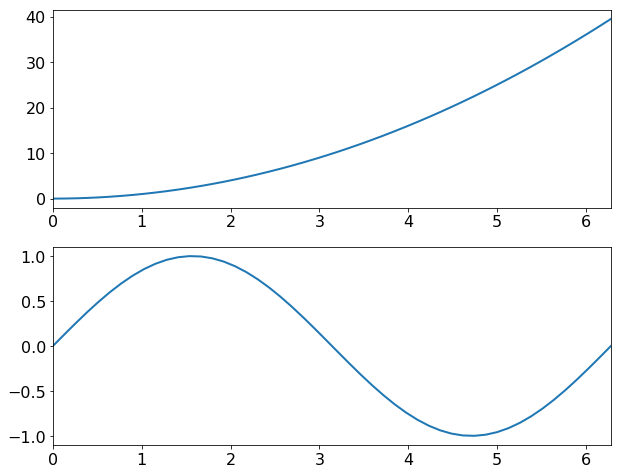

In [37]:
x = np.linspace(0, 2 * np.pi)

# #rows, #columns, plot index = row * (#cols) + col
plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2 * np.pi)

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2 * np.pi)

### You should almost always call `plt.tight_layout()`

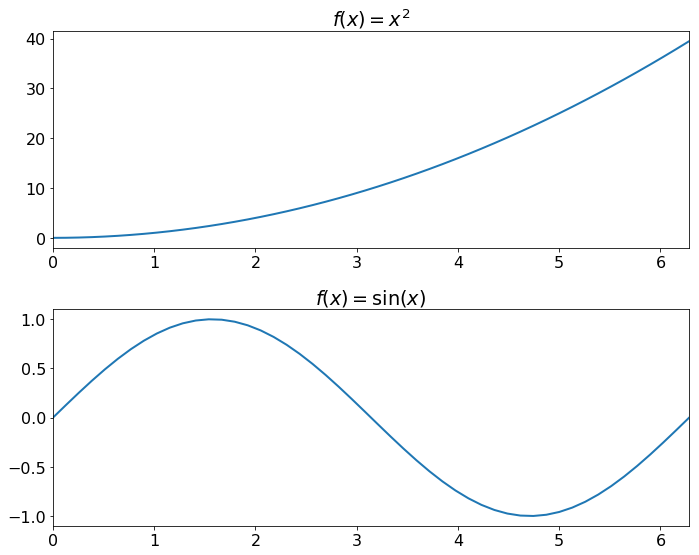

In [40]:
x = np.linspace(0, 2 * np.pi)

# Anzahl Zeile, Anzahl Spalten, Nummer des Plots
plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2 * np.pi)
plt.title(r"$f(x)=x^2$")

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2 * np.pi)
plt.title(r"$f(x)=\sin(x)$")

plt.tight_layout()

Plot inside another plot

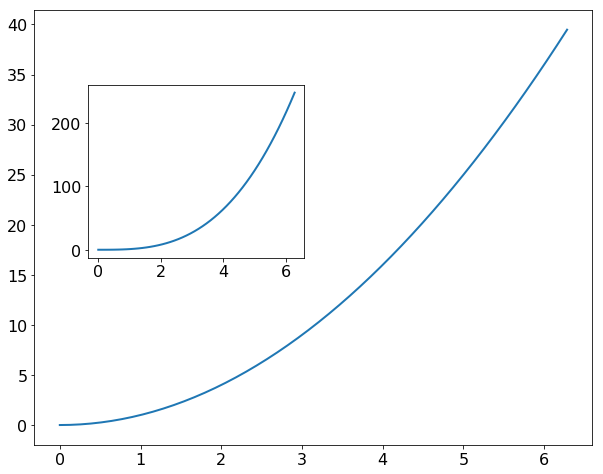

In [42]:
plt.plot(x, x**2)

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)

## Errorbars

<Container object of 3 artists>

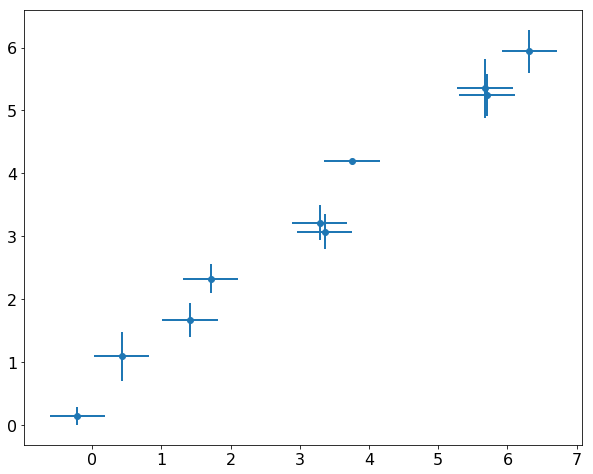

In [43]:
x = np.linspace(0, 2 * np.pi, 10)
errX = np.random.normal(0, 0.4, 10)
errY = np.random.normal(0, 0.4, 10)

plt.errorbar(
    x + errX,
    x + errY,
    xerr=0.4,
    yerr=errY,
    fmt='o'
)

### Asymmetrical errors

### Lower and upper limits

## Axis-Scales


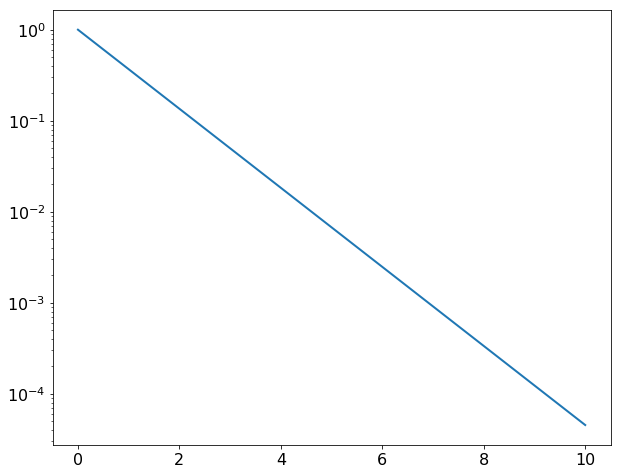

In [49]:
x = np.linspace(0, 10)
# x = np.logspace(-1, 2, 100)

plt.plot(x, np.exp(-x))
plt.yscale('log')
# plt.xscale('log')

## Polar Plots

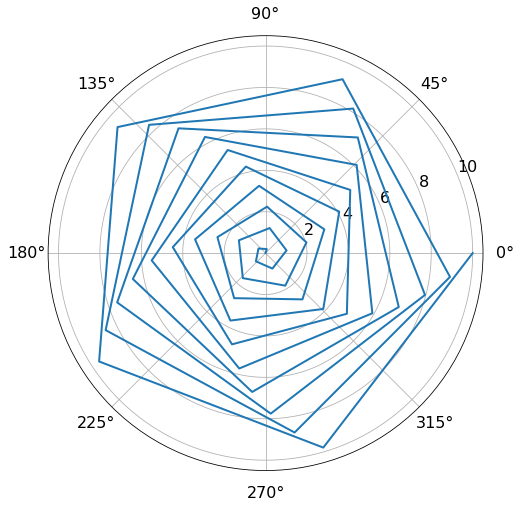

In [50]:
# r = np.linspace(0, 10, 1000)
r = np.linspace(0, 10, 50)
theta = 2 * np.pi * r

plt.polar(theta, r)

# Ticks

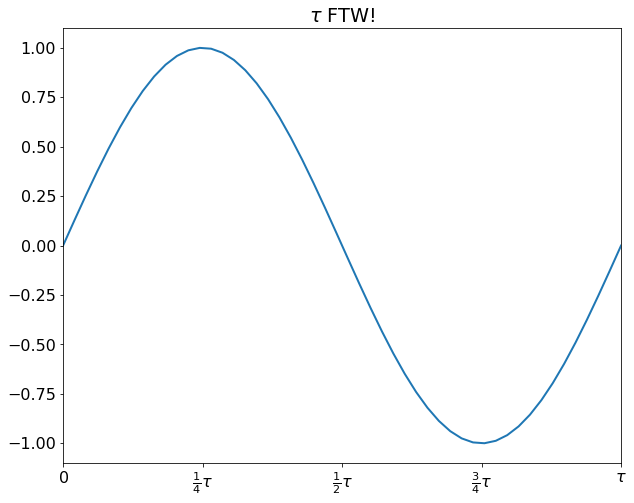

In [53]:
x = np.linspace(0, 2 * np.pi)

plt.plot(x, np.sin(x))
plt.xlim(0, 2 * np.pi)
# First argument: position, second argument: labels
plt.xticks(
    np.arange(0, 2*np.pi + 0.1, np.pi / 2),
    [r"$0$", r"$\frac{1}{4}\tau$", r"$\frac{1}{2}\tau$", r"$\frac{3}{4}\tau$", r"$\tau$"]
)
plt.title(r"$\tau$ FTW!")

(0, 11)

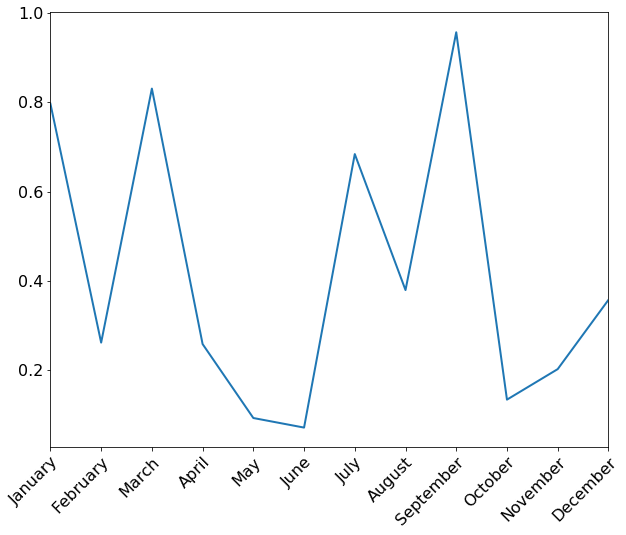

In [54]:
months = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.plot(np.arange(12), np.random.rand(12))
plt.xticks(np.arange(12), months, rotation=45, rotation_mode='anchor', ha='right', va='top')
plt.xlim(0, 11)

# Histograms

(array([   1.,    1.,    3.,    9.,   13.,   21.,   29.,   34.,   54.,
          93.,  104.,  119.,   95.,  126.,   92.,   72.,   53.,   35.,
          20.,   11.,    5.,    5.,    0.,    2.,    3.]),
 array([-3.33979616, -3.06287771, -2.78595927, -2.50904082, -2.23212238,
        -1.95520393, -1.67828549, -1.40136704, -1.1244486 , -0.84753015,
        -0.57061171, -0.29369326, -0.01677482,  0.26014363,  0.53706207,
         0.81398052,  1.09089896,  1.36781741,  1.64473585,  1.9216543 ,
         2.19857274,  2.47549119,  2.75240963,  3.02932808,  3.30624652,
         3.58316497]),
 <a list of 25 Patch objects>)

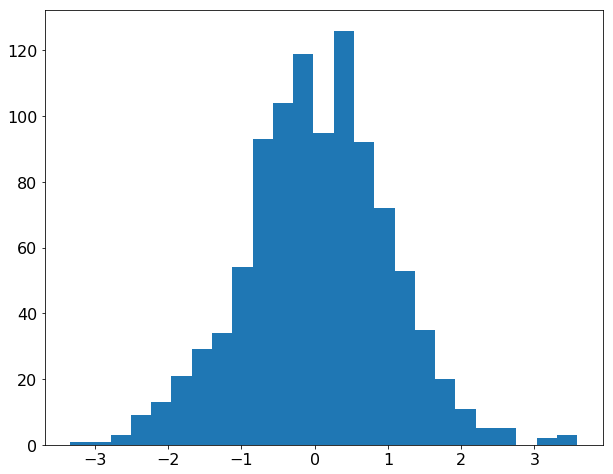

In [55]:
# Zufallsdaten generieren:
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=25)

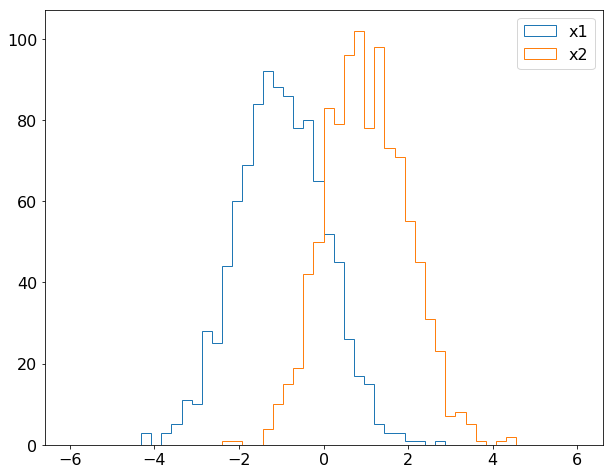

In [58]:
x1 = np.random.normal(-1, 1, 1000)
x2 = np.random.normal(1, 1, 1000)

bin_edges = np.linspace(-6, 6, 51)  # 50 bins between -6 and 6

plt.hist(x1, bins=bin_edges, histtype='step', label='x1')
plt.hist(x2, bins=bin_edges, histtype='step', label='x2')

plt.legend()

# Using the object orientated syntax

Matplotlib has two APIs (yes, it's strange).

* The matlab-like syntax we used until now
    * Easier to write
    * Familiar for matlab users
    * Uses much global state
* Object-oriented syntax
    * More powerfull
    * More control over the plots
    * preferable for library code
    * no (or at least very few) global state

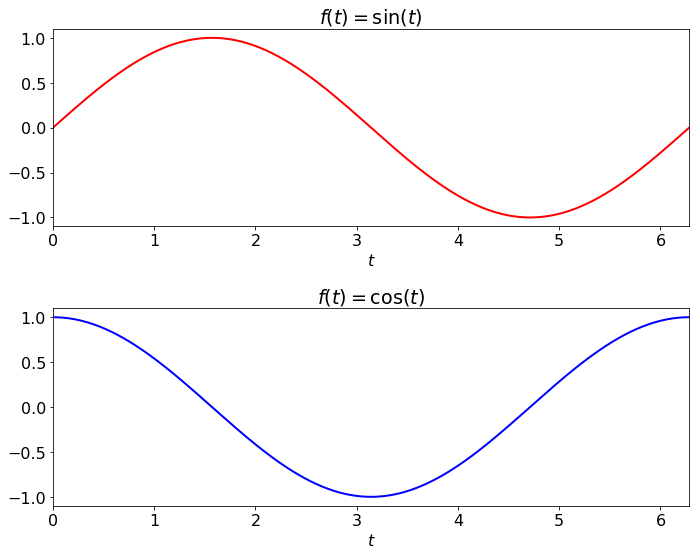

In [59]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.pi, 1000)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(t, np.sin(t), 'r-')
ax1.set_title(r"$f(t)=\sin(t)$")
ax1.set_xlabel("$t$")
ax1.set_xlim(0, 2 * np.pi)
ax1.set_ylim(-1.1, 1.1)

ax2.plot(t, np.cos(t), 'b-')
ax2.set_title(r"$f(t)=\cos(t)$")
ax2.set_xlabel("$t$")
ax2.set_xlim(0, 2 * np.pi)
ax2.set_ylim(-1.1, 1.1)

fig.tight_layout()

## Using the local LaTeX installation to make full use of LaTeX for plots

* Same font and font sizes as in your publication
* Really high quality, publication ready plots